# 21기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [ ]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [ ]:
df.info() # param: Gender(M/F), Age ,Annual Income, Spending Scoring

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

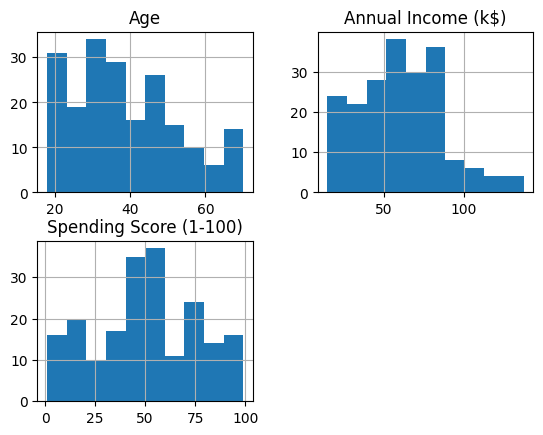

In [ ]:
df.hist() # 20~40대 사이가 많음
          # 소득은 50~90사이가 많음
          #

<Axes: >

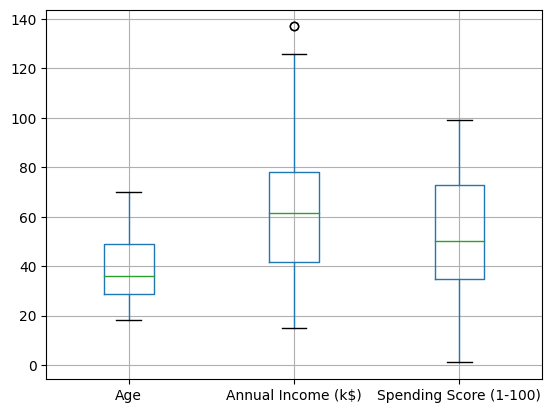

In [ ]:
df.boxplot()

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df[df['Spending Score (1-100)'] == 99]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
12,Female,35,19,99


In [ ]:
df[df['Annual Income (k$)'] == max(df['Annual Income (k$)'])] # 199번은 제거가 적당해 보임

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
199,Male,32,137,18
200,Male,30,137,83


In [ ]:
df = df.drop(199)
df.iloc[198,:]

Gender                    Male
Age                         30
Annual Income (k$)         137
Spending Score (1-100)      83
Name: 200, dtype: object

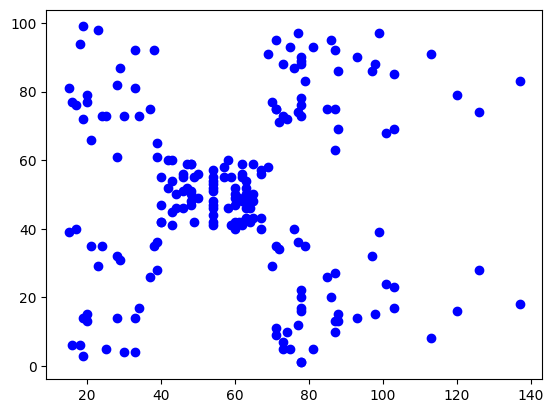

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Annual Income (k$)'], df['Spending Score (1-100)'],'bo')

## 2. Clustering

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
195,Female,47,120,16
196,Female,35,120,79
197,Female,45,126,28


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Preprocessing (scaling)
from sklearn.preprocessing import StandardScaler

# Splitting data into training and testing sets
X_train, X_test = train_test_split(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], test_size=0.3, random_state=42)

# Preprocessing training data (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Choosing the number of clusters
num_clusters = 5

# Applying K-means clustering on training data
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)
train_clusters = kmeans.predict(X_train_scaled)


## 3. Evaluation

In [ ]:

# Preprocessing testing data (scaling)
X_test_scaled = scaler.transform(X_test)

# Predicting clusters for testing data
test_clusters = kmeans.predict(X_test_scaled)

# Evaluating clustering using silhouette score
train_silhouette_score = silhouette_score(X_train_scaled, train_clusters)
test_silhouette_score = silhouette_score(X_test_scaled, test_clusters)

print("Training silhouette score:", train_silhouette_score)
print("Testing silhouette score:", test_silhouette_score)


Training silhouette score: 0.4148862357905701
Testing silhouette score: 0.4407711289479298


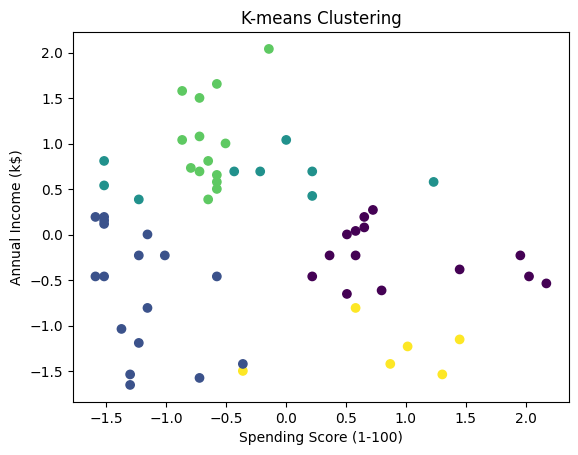

In [ ]:
# Visualizing the clusters
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_clusters, cmap='viridis')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('K-means Clustering')
plt.show()